# Assignment 02: Solutions


In [8]:
import random
import time


---

## Grade-school multiplication

This code was given as part of the assignment.

In [9]:
def multiply(x: str, y: str) -> str:
    """Grade-school recursive split multiplication on decimal strings."""
    # BASE CASE
    # single digit multiplication
    if len(x) == 1 and len(y) == 1:
        return str(int(x) * int(y))

    # RECURSIVE PART
    # Shortcut to length
    n = max(len(x), len(y))
    # Zero-pad x to the left, for equal length
    if len(x) < n:
        x = "0" * (n - len(x)) + x
    # Zero-pad y to the right, for equal length
    if len(y) < n:
        y = "0" * (n - len(y)) + y
    # Split x,y in left and right halves
    half = n // 2
    a = x[:-half] if half > 0 else x
    b = x[-half:] if half > 0 else "0"
    c = y[:-half] if half > 0 else y
    d = y[-half:] if half > 0 else "0"
    # Compute partial products; multiply ac by 10^b
    ac = multiply(a, c) + ("0" * (2 * half))
    ad = multiply(a, d)
    bc = multiply(b, c)
    bd = multiply(b, d)
    # Multiply (ad+bc) by 10^{n/2}
    ad_plus_bc = str(int(ad) + int(bc)) + ("0" * half)
    # Done
    return str(int(ac) + int(ad_plus_bc) + int(bd))


---

## Karatsuba implementation

The code below contains some guard statements, just for illustrative purposes. The essential code begins near line 18 where the base cases are computed.

In [10]:
def karatsuba(x: str, y: str) -> str:
    """Karatsuba multiplication on non-negative decimal strings."""
    # Guard statements - a bit excessive but shown here for illustragiv
    # purposes.
    if x is None or y is None:
        raise ValueError("Inputs must be non-empty strings of digits.")
    x = x.strip()
    y = y.strip()
    if x == "" or y == "":
        raise ValueError("Inputs must be non-empty strings of digits.")
    if not x.isdigit() or not y.isdigit():
        raise ValueError("Inputs must contain only digits (non-negative integers).")

    # Just to be safe, make sure x, y are clean strings with int content
    x = str(int(x))
    y = str(int(y))

    # BASE CASES
    # Trivial and single-digit products
    if x == "0" or y == "0":
        return "0"
    if len(x) == 1 and len(y) == 1:
        return str(int(x) * int(y))

    # RECURSIVE PART
    # Shortcult to common length
    n = max(len(x), len(y))
    # Zero-pad x if needed
    if len(x) < n:
        x = "0" * (n - len(x)) + x
    # Zero-pad y if needed
    if len(y) < n:
        y = "0" * (n - len(y)) + y
    # Split inputs in left and right halves
    half = n // 2
    a = x[:-half] if half > 0 else x
    b = x[-half:] if half > 0 else "0"
    c = y[:-half] if half > 0 else y
    d = y[-half:] if half > 0 else "0"

    # Compute partial products
    z2 = karatsuba(a, c)
    z0 = karatsuba(b, d)
    z1_raw = karatsuba(str(int(a) + int(b)), str(int(c) + int(d)))
    z1 = str(int(z1_raw) - int(z2) - int(z0))
    # Multiply by powers of 10 by zero padding to the right
    z2_shifted = z2 + ("0" * (2 * half))
    z1_shifted = z1 + ("0" * half)
    # Done
    return str(int(z2_shifted) + int(z1_shifted) + int(z0))


---

## A simple simulation

The code below runs the two multiplication techniques and prints their results side-by-side. Time is measured in nanoseconds.

In [11]:
def simple_simulate() -> None:
    """Simple simulation method comparing grade school and Karatsuba
    multiplications side by side"""
    n = 2
    up_to = 2048

    # Range of digits to use in trial inputs
    low = 0
    high = 9

    print("   n\tmultiply (ns)\tkaratsuba (ns)")
    while n <= up_to:
        # Create random valued x and y with n digits
        x = "".join(str(random.randint(low, high)) for _ in range(n))
        y = "".join(str(random.randint(low, high)) for _ in range(n))

        # Time grade-school multiplication
        t0 = time.time_ns()
        _ = multiply(x, y)
        t1 = time.time_ns()
        t_mul = t1 - t0

        # Time Karatsuba multiplication
        t0 = time.time_ns()
        _ = karatsuba(x, y)
        t1 = time.time_ns()
        t_kar = t1 - t0

        # Print results
        print(f"{n:4d}\t{t_mul:14,d}\t{t_kar:14,d}")

        # Double the input size and try again
        n *= 2


---

## Advanced simulation

This code uses `pandas` dataframes to hold the timing data, then produces plots visualizing the behavior of the two algorithms. This kind of simulation is beyond the scope of the assignment. It is published here for illustrative purposes.

*This simulation takes about 2-4 minutes to complete.*

In [ ]:
import statistics as stats  # for descriptive statistics
import pandas as pd  # for staging the plots
import matplotlib.pyplot as plt  # for plotting the results


def advanced_simulate(
    trials: int = 15, seed: int | None = 0
) -> tuple[pd.DataFrame, pd.DataFrame]:
    """
    Runs multiple timing trials for each n and returns:
      - df_trials: one row per (n, trial)
      - df_summary: aggregated stats per n (median/mean/stdev)
    """
    if trials <= 0:
        raise ValueError("trials must be a positive integer")

    if seed is not None:
        random.seed(seed)

    n = 2
    up_to = 2048

    # Range of digits to use
    low = 0
    high = 9

    # Temp holder for results
    trial_rows: list[dict[str, int]] = []

    print(f"Trials per n: {trials}")
    print("   n\tmul_med(ns)\tkar_med(ns)\tmul_mean(ns)\tkar_mean(ns)")
    while n <= up_to:
        mul_times: list[int] = []
        kar_times: list[int] = []
        # Repeat each experiment as many times as specified by trials
        # for smoother results
        for t in range(trials):
            # Create random inputs
            x = "".join(str(random.randint(low, high)) for _ in range(n))
            y = "".join(str(random.randint(low, high)) for _ in range(n))

            # Time grade-school multiplication
            t0 = time.time_ns()
            _ = multiply(x, y)
            t_mul = time.time_ns() - t0

            # Time Karatsuba multiplication
            t0 = time.time_ns()
            _ = karatsuba(x, y)
            t_kar = time.time_ns() - t0

            # Update the records for descriptive statistics
            mul_times.append(t_mul)
            kar_times.append(t_kar)

            # Update the records for the dataframe stage
            trial_rows.append(
                {
                    "n": n,
                    "trial": t,
                    "multiply_ns": t_mul,
                    "karatsuba_ns": t_kar,
                }
            )

        # Compute descriptive statistics
        mul_med = int(stats.median(mul_times))
        kar_med = int(stats.median(kar_times))
        mul_mean = int(stats.fmean(mul_times))
        kar_mean = int(stats.fmean(kar_times))

        # Print descriptive statistics
        print(
            f"{n:4d}\t{mul_med:15,d}\t{kar_med:15,d}\t{mul_mean:15,d}\t{kar_mean:15,d}"
        )
        # Double the size of the inputs
        n *= 2

    # Loop ended; move records to dataframe for easier handling
    df_trials = pd.DataFrame(trial_rows)

    # Summary stats per n
    grouped = df_trials.groupby("n", as_index=False).agg(
        multiply_median_ns=("multiply_ns", "median"),
        multiply_mean_ns=("multiply_ns", "mean"),
        multiply_std_ns=("multiply_ns", "std"),
        karatsuba_median_ns=("karatsuba_ns", "median"),
        karatsuba_mean_ns=("karatsuba_ns", "mean"),
        karatsuba_std_ns=("karatsuba_ns", "std"),
    )

    # Speedup metrics (using medians for robustness)
    grouped["speedup_mul_over_kar_median"] = (
        grouped["multiply_median_ns"] / grouped["karatsuba_median_ns"]
    )

    df_summary = grouped

    # ---- Plot 1: median timings (log y) ----
    plt.figure()
    plt.plot(
        df_summary["n"],
        df_summary["multiply_median_ns"],
        marker="o",
        label="multiply median",
    )
    plt.plot(
        df_summary["n"],
        df_summary["karatsuba_median_ns"],
        marker="o",
        label="karatsuba median",
    )
    plt.yscale("log")
    plt.xlabel("n (digits)")
    plt.ylabel("time (ns) [log scale]")
    plt.title("Multiply vs Karatsuba (median of trials)")
    plt.grid(True, which="both")
    plt.legend()

    # ---- Plot 2: optional variability band (median ± 1 std of trials) ----
    # Note: std is around the *mean* by definition; we still use it as a quick variability indicator.
    plt.figure()
    x = df_summary["n"]

    mul_center = df_summary["multiply_mean_ns"]
    mul_std = df_summary["multiply_std_ns"].fillna(0)

    kar_center = df_summary["karatsuba_mean_ns"]
    kar_std = df_summary["karatsuba_std_ns"].fillna(0)

    plt.plot(x, mul_center, marker="o", label="multiply mean")
    plt.fill_between(x, mul_center - mul_std, mul_center + mul_std, alpha=0.2)

    plt.plot(x, kar_center, marker="o", label="karatsuba mean")
    plt.fill_between(x, kar_center - kar_std, kar_center + kar_std, alpha=0.2)

    plt.yscale("log")
    plt.xlabel("n (digits)")
    plt.ylabel("time (ns) [log scale]")
    plt.title("Multiply vs Karatsuba (mean ± std across trials)")
    plt.grid(True, which="both")
    plt.legend()

    # ---- Plot 3: speedup ratio from medians (>1 means Karatsuba faster) ----
    plt.figure()
    plt.plot(df_summary["n"], df_summary["speedup_mul_over_kar_median"], marker="o")
    plt.axhline(1.0, linestyle="--")
    plt.xscale("log", base=2)
    plt.xlabel("n (digits) [log2 scale]")
    plt.ylabel("multiply_median / karatsuba_median")
    plt.title("Relative performance (medians): above 1 => Karatsuba faster")
    plt.grid(True, which="both")

    plt.show()
    return df_trials, df_summary

Trials per n: 15
   n	mul_med(ns)	kar_med(ns)	mul_mean(ns)	kar_mean(ns)
   2	          7,224	         20,638	         10,217	         20,937
   4	         29,525	         67,916	         29,281	        670,061
   8	        124,813	        228,907	        786,947	        678,377
  16	        501,356	        755,510	        939,791	      1,057,796
  32	        892,677	      1,038,919	      1,399,503	      1,476,288
  64	      3,629,045	      3,353,361	      4,866,642	      4,051,596
 128	     14,378,374	      9,363,832	     15,669,858	      9,535,548
 256	     57,622,260	     28,274,899	     61,868,433	     28,885,929
 512	    257,621,115	     88,468,119	    262,979,491	     93,765,934
1024	    986,399,440	    259,530,340	  1,006,606,858	    273,269,434
2048	  4,079,298,349	    822,431,801	  4,639,554,010	    966,274,195


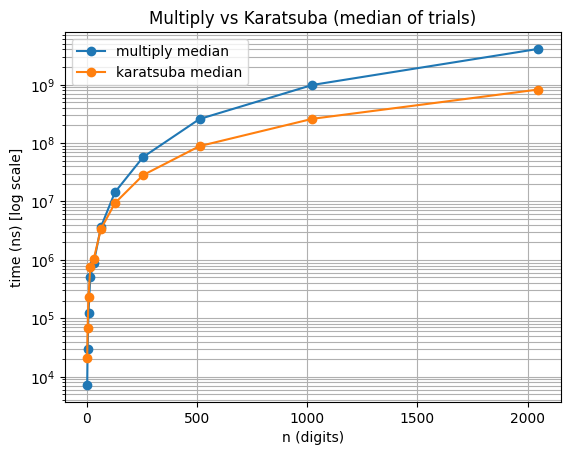

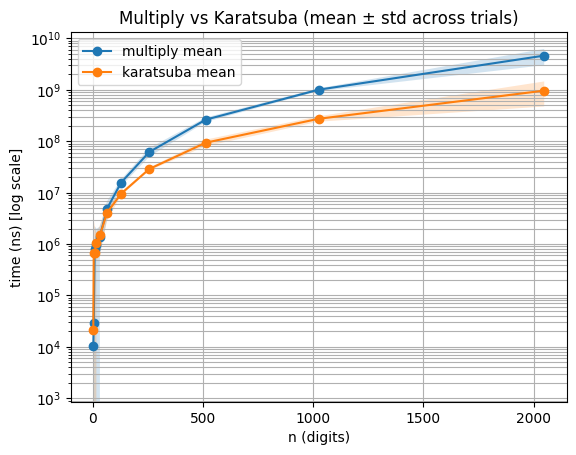

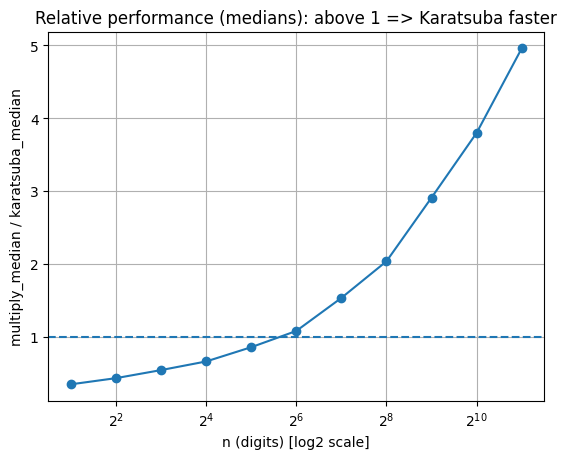


Summary:
   n  multiply_median_ns  multiply_mean_ns  multiply_std_ns  karatsuba_median_ns  karatsuba_mean_ns  karatsuba_std_ns  speedup_mul_over_kar_median
   2              7224.0      1.021733e+04     8.397606e+03              20638.0       2.093773e+04      5.697927e+03                     0.350034
   4             29525.0      2.928133e+04     2.624499e+03              67916.0       6.700616e+05      2.336320e+06                     0.434728
   8            124813.0      7.869472e+05     1.467636e+06             228907.0       6.783771e+05      1.603678e+06                     0.545256
  16            501356.0      9.397915e+05     1.048242e+06             755510.0       1.057796e+06      5.809504e+05                     0.663599
  32            892677.0      1.399503e+06     7.883993e+05            1038919.0       1.476288e+06      8.528020e+05                     0.859236
  64           3629045.0      4.866642e+06     1.935251e+06            3353361.0       4.051596e+06      1.2

In [13]:
def main() -> None:
    df_trials, df_summary = advanced_simulate(trials=15, seed=0)

    print("\nSummary:")
    print(df_summary.to_string(index=False))


if __name__ == "__main__":
    main()


---

## Discussion

The results show that Karatsuba outperforms grade-school multiplication for mumbers with 64 or more digits. But we expect Karatsuba to be faster, in general, so why is it slower for numbers with 32 digits and less? 

In theory Karatsuba is in $\mathcal O(n^{1.58})$ and grade-school is in $\mathcal O(n^2)$. In practice, however, Karatsuba has more `str`/`int` operations than grade school. These operations slow down Karatsuba enough to give the slower grade-school technique the edge. Karatsuba, however, takes the lead for seriously large numbers.